# Python Assignment 3



* Nur Anisah
* PYTN-KS12-016
* Batch 4 - Python for Data Science

## Project Overview

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are four datasets:

- bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
- bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
- bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).
- bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).

The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

This dataset contains:

Input variables:

- bank client data:
1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no', 'yes', 'unknown')
6. housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
7. loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

- related with the last contact of the current campaign:
8. contact: contact communication type (categorical: 'cellular', 'telephone')
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon', 'tue', 'wed', 'thu', 'fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

- other attributes:
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure', 'nonexistent', 'success')

- social and economic context attributes
16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric)
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19. euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)

- Output variable (desired target):

21. y - has the client subscribed a term deposit? (binary: 'yes', 'no')

## Data Preparation

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import sklearn.tree as tree
import pydotplus
from IPython.display import Image
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../dataset/bank-additional-full.csv', delimiter=";")

In [12]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [24]:
df.tail(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41178,62,retired,married,university.degree,no,no,no,cellular,nov,thu,...,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41179,64,retired,divorced,professional.course,no,yes,no,cellular,nov,fri,...,3,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41180,36,admin.,married,university.degree,no,no,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41182,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [10]:
df.shape

(4119, 21)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [3]:
# Data Test
df_test = pd.read_csv('../dataset/bank-additional.csv', delimiter=";")

In [17]:
df_test.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
5,32,services,single,university.degree,no,no,no,cellular,sep,thu,...,3,999,2,failure,-1.1,94.199,-37.5,0.884,4963.6,no
6,32,admin.,single,university.degree,no,yes,no,cellular,sep,mon,...,4,999,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,no
7,41,entrepreneur,married,university.degree,unknown,yes,no,cellular,nov,mon,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
8,31,services,divorced,professional.course,no,no,no,cellular,nov,tue,...,1,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no
9,35,blue-collar,married,basic.9y,unknown,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no


In [18]:
df_test.shape

(4119, 21)

In [19]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

## Data Cleaning 

In [4]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [7]:
df.duplicated().sum()

12

In [22]:
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

## Visualization

#### Menghitung persentase keputusan akhir clien untuk bergabung dengan campaign bank atau tidak.

In [27]:
df_decision = df['y'].value_counts(normalize=True)*100
df_decision

no     88.734583
yes    11.265417
Name: y, dtype: float64

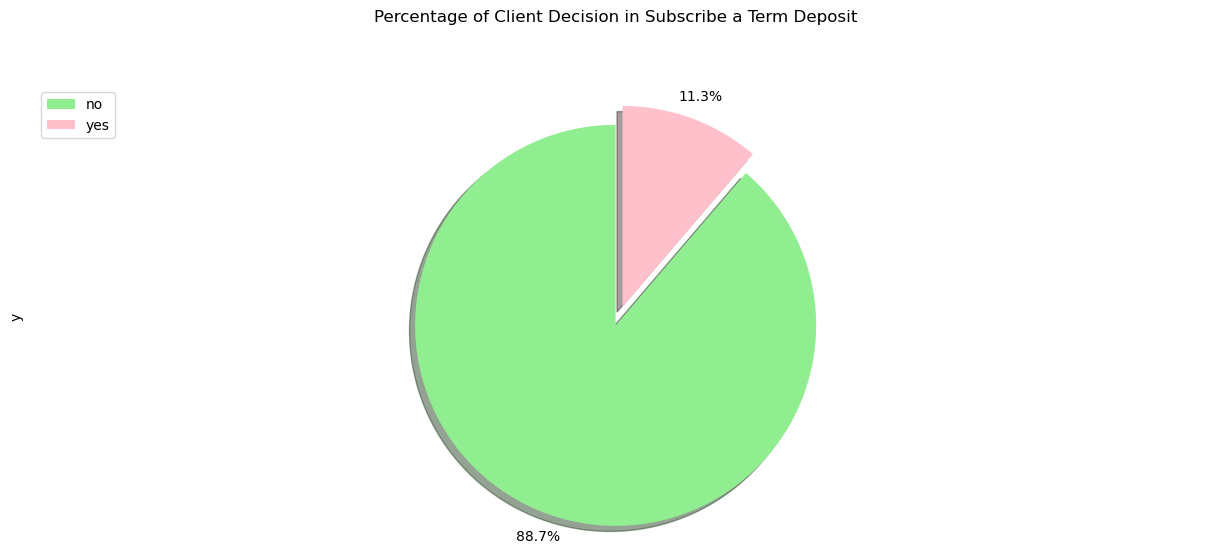

In [29]:
color_list = ['lightgreen', 'pink']
explode_list = [0.1, 0]

df_decision.plot(kind='pie',
                           figsize=(15, 6),
                           autopct='%1.1f%%',
                           startangle=90,
                           shadow=True,
                           labels=None,
                           pctdistance=1.12,
                           colors=color_list,
                           explode=explode_list)
plt.title('Percentage of Client Decision in Subscribe a Term Deposit',y=1.12)
plt.axis('equal')

# add legend
plt.legend(labels=df_decision.index, loc='upper left')
plt.show();

Dari pie chart di atas dapat dilihat bahwa sebanyak 88.7% memilih untuk tidak menggunakan deposit dan hanya 11.3% yang memilih menggunakan deposit.

#### Bagaimana persebaran umur clien direct marketing campaigns?

<AxesSubplot:ylabel='Frequency'>

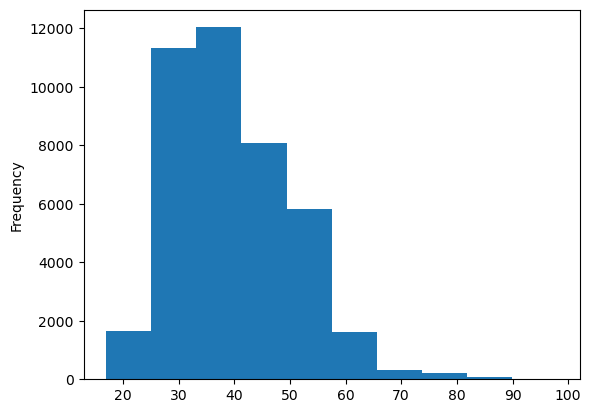

In [30]:
df_age = df['age']
df_age.plot(kind='hist')

Dari histogram diatas dapat dilihat bahwa kisaran umur klien dengan frekuensi paling tinggi berada di antara 35 hingga 40 tahun.

## Data Preprocessing

In [31]:
# Mengelompokkan kolom berdasarkan tipe data
numerical = ['age', 'duration','campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration','campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
boolean = ['y']

In [32]:
le = preprocessing.LabelEncoder()

In [33]:
# Mengubah data categorical ke data numeric
for col in categorical:
    df[col] = le.fit_transform(df[col])
    df[col] = le.fit_transform(df[col]) 
    
for col in categorical:
    df_test[col] = le.fit_transform(df_test[col])
    df_test[col] = le.fit_transform(df_test[col]) 

In [34]:
# Mengubah data binary ke data numeric
for col in boolean:
    df[col] = le.fit_transform(df[col])
    df_test[col] = le.fit_transform(df_test[col])

In [50]:
 # Menghapus data yang memiliki hasil unknown
df = df[df[col].isin([0,1])]
df_test = df_test[df_test[col].isin([0,1])]

In [46]:
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [37]:
df_test.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,1,1,2,0,2,0,0,6,0,...,2,999,0,1,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,7,2,3,0,0,0,1,6,0,...,4,999,0,1,1.1,93.994,-36.4,4.855,5191.0,0
2,25,7,1,3,0,2,0,1,4,4,...,1,999,0,1,1.4,94.465,-41.8,4.962,5228.1,0
3,38,7,1,2,0,1,1,1,4,0,...,3,999,0,1,1.4,94.465,-41.8,4.959,5228.1,0
4,47,0,1,6,0,2,0,0,7,1,...,1,999,0,1,-0.1,93.200,-42.0,4.191,5195.8,0


In [38]:
# Menentukan x_train dan y_train
x_arr = df[features].to_numpy()
x_train = x_arr
y_arr = df['y'].astype('int')
y_arr = y_arr.to_numpy()
y_train = y_arr

In [49]:
df_test.duplicated().sum()

0

In [44]:
# Menentukan x_test dan y_test
x_arr2 = df_test[features].to_numpy()
x_test = x_arr2
y_arr2 = df_test['y'].astype('int')
y_arr2 = y_arr2.to_numpy()
y_test = y_arr2

## Classification

### Logistic Regression

In [119]:
lr = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr', random_state=1)
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)   

print(classification_report(y_test, lr_pred))
print("Logistic Regression Models Accuracy:",metrics.accuracy_score(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      3668
           1       0.68      0.41      0.51       451

    accuracy                           0.91      4119
   macro avg       0.80      0.69      0.73      4119
weighted avg       0.90      0.91      0.90      4119

Logistic Regression Models Accuracy: 0.913814032532168


Berdasarkan hasil dari tabel diatas, didapatkan hasil akurasi model yang cukup baik yaitu 0,9138 atau sebesar 91,38% 

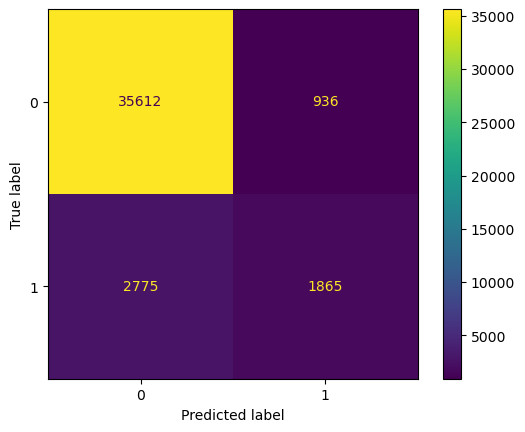

In [120]:
plot_confusion_matrix(lr, x_train, y_train)

Matriks yang diperoleh menunjukkan hasil sebagai berikut:

* 35612 prediksi true negatif : data prediksi benar dinyatakan sebagai nol
* 2775 prediksi false negatif: data prediksi salah dinyatakan sebagai nol.
* 936 prediksi false positif: data prediksi salah dinyatakan sebagai satu.
* 1865 prediksi positif yang benar: data prediksi benar dinyatakan sebagai satu.

### K-Nearest Neighbor (KNN)

In [55]:
error = []

Text(0, 0.5, 'Error mean')

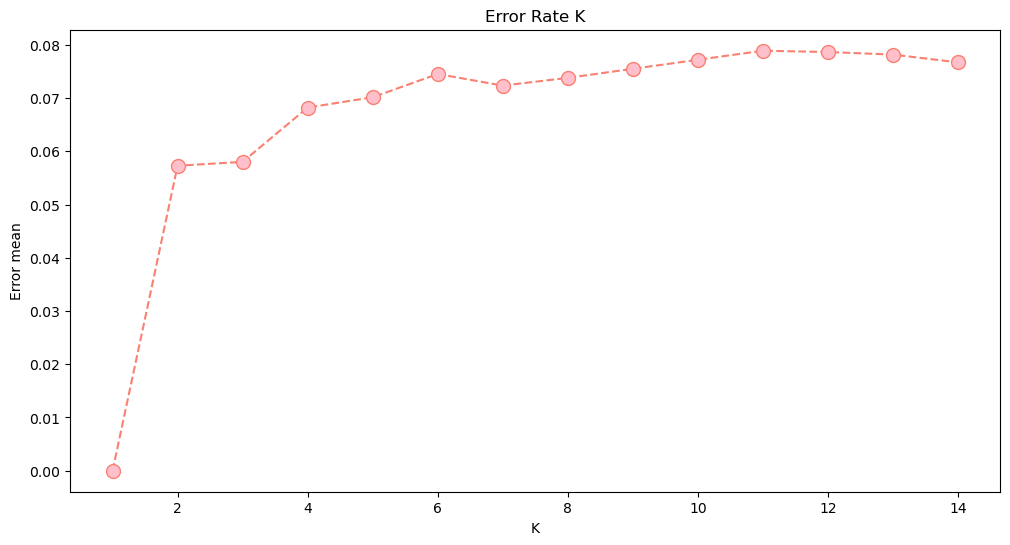

In [135]:
plt.figure(figsize=(12,6))
plt.plot(range(1,15), error, color='salmon', linestyle='dashed', marker='o', markerfacecolor='pink', markersize=10)
plt.title('Error Rate K')
plt.xlabel('K')
plt.ylabel('Error mean')

Berdasarkan angka Error Rate K, nilai K diputuskan pada 6 karena tidak ada peningkatan signifikan terhadap kesalahan berarti dari 7 ke atas.

In [121]:
# Create KNN Classifier
knn=KNeighborsClassifier(n_neighbors=5)

# Train the Model
knn.fit(x_train, y_train)

# Predict the Response
y_predict = knn.predict(x_test)

print("KNN models Accuracy:", accuracy_score(y_test, y_predict))

KNN models Accuracy: 0.9298373391599903


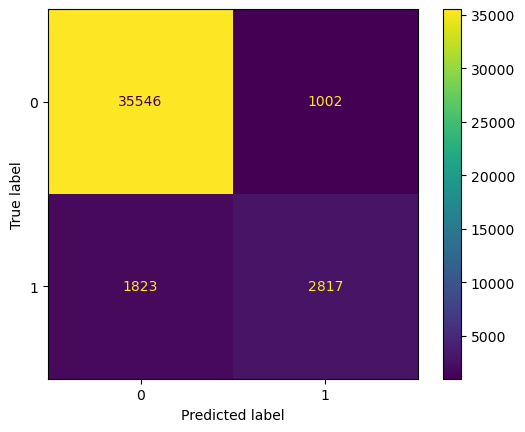

In [122]:
plot_confusion_matrix(knn, x_train, y_train)

Matriks yang diperoleh menunjukkan hasil sebagai berikut:

* 35546 prediksi true negatif : data prediksi benar dinyatakan sebagai nol
* 1823 prediksi false negatif: data prediksi salah dinyatakan sebagai nol.
* 1002 prediksi false positif: data prediksi salah dinyatakan sebagai satu.
* 2817 prediksi positif yang benar: data prediksi benar dinyatakan sebagai satu.

## Support Vector Machine

In [127]:
svm = svm.SVC(kernel='linear')
svm.fit(x_train, y_train)
y_predict = svm.predict(x_test)
print("SVM Models Accuracy:", accuracy_score(y_test, y_predict))

SVM Models Accuracy: 0.8997329448895363


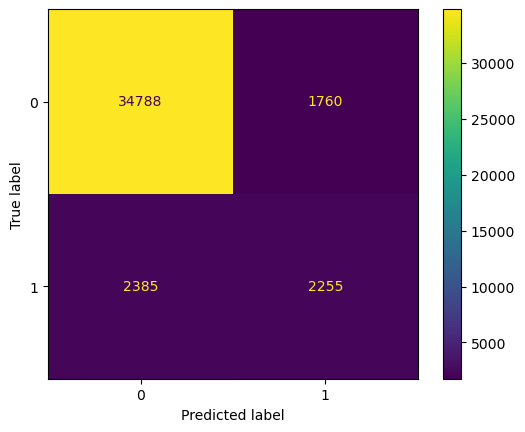

In [128]:
plot_confusion_matrix(svm, x_train, y_train)

Matriks yang diperoleh menunjukkan hasil sebagai berikut:

* 34788 prediksi true negatif : data prediksi benar dinyatakan sebagai nol
* 2385 prediksi false negatif: data prediksi salah dinyatakan sebagai nol.
* 1760 prediksi false positif: data prediksi salah dinyatakan sebagai satu.
* 2255 prediksi positif yang benar: data prediksi benar dinyatakan sebagai satu.

## Decision Tree Classifier

In [69]:
max_depths = list(range(1,20))
criterion = ['gini', 'entropy']

param_grid = {'criterion': criterion,
              'max_depth': max_depths}

grid_search = GridSearchCV(DecisionTreeClassifier(),param_grid,scoring='accuracy')
grid_search.fit(x_train, y_train)
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 1}

In [130]:
dct = DecisionTreeClassifier(max_depth=1, criterion='entropy')
dct.fit(x_train, y_train)
y_predict = dct.predict(x_test)

In [131]:
print("Decision Tree Models Accuracy:", accuracy_score(y_test, y_predict))

Decision Tree Models Accuracy: 0.890507404709881


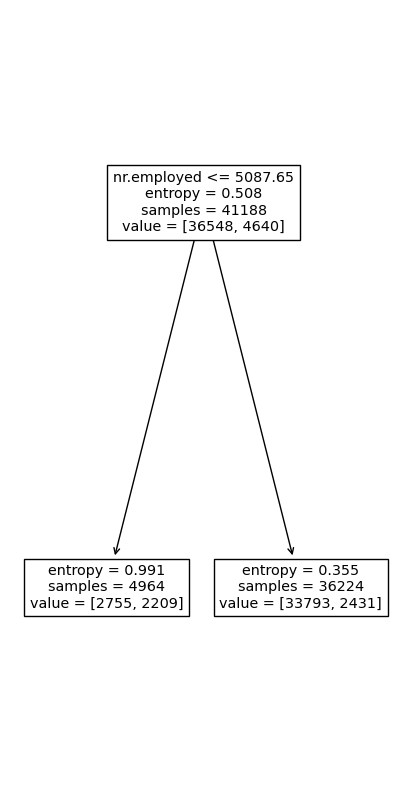

In [76]:
figure, ax = plt.subplots(figsize=(5,10))
tree.plot_tree(dct, ax=ax, feature_names=features)
plt.show()

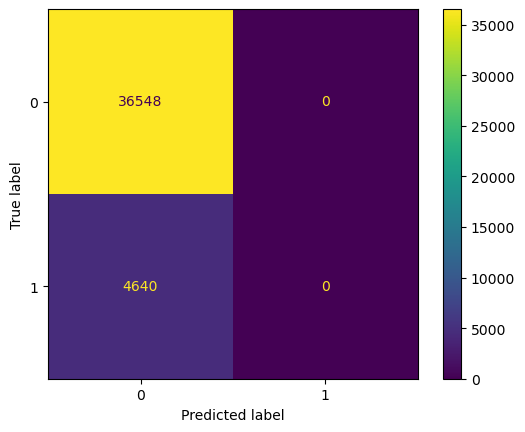

In [77]:
plot_confusion_matrix(dct, x_train, y_train)

Matriks yang diperoleh menunjukkan hasil sebagai berikut:

* 36548 prediksi true negatif : data prediksi benar dinyatakan sebagai nol
* 4640 prediksi false negatif: data prediksi salah dinyatakan sebagai nol.
* 0 prediksi false positif: data prediksi salah dinyatakan sebagai satu.
* 0 prediksi positif yang benar: data prediksi benar dinyatakan sebagai satu.

## Random Forest Classifier

In [132]:
rf = RandomForestClassifier(max_depth=3, criterion='entropy')
rf.fit(x_train, y_train)
y_predict = rf.predict(x_test)
print("Random Forest Models Accuracy:", accuracy_score(y_test, y_predict))

Random Forest Models Accuracy: 0.9041029376062151


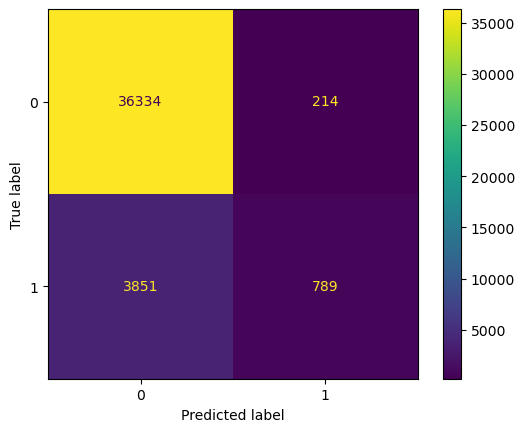

In [133]:
plot_confusion_matrix(rf, x_train, y_train)

Matriks yang diperoleh menunjukkan hasil sebagai berikut:

* 36385 prediksi true negatif : data prediksi benar dinyatakan sebagai nol
* 3889 prediksi false negatif: data prediksi salah dinyatakan sebagai nol.
* 163 prediksi false positif: data prediksi salah dinyatakan sebagai satu.
* 751 prediksi positif yang benar: data prediksi benar dinyatakan sebagai satu.

## Naive Bayes

In [134]:
nb = GaussianNB()
nb.fit(x_train, y_train)
y_predict = nb.predict(x_test)
print("Naive Bayes Models Accuracy:", accuracy_score(y_test, y_predict))

Naive Bayes Models Accuracy: 0.8465647001699441


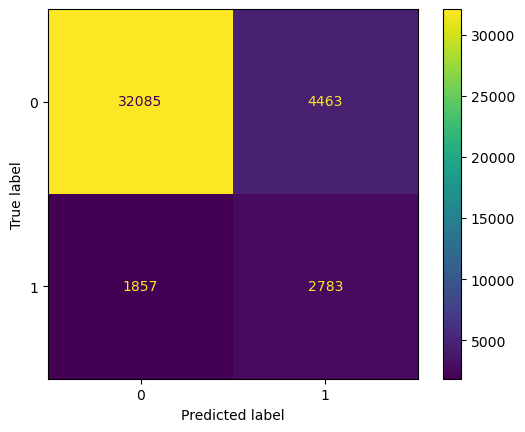

In [85]:
plot_confusion_matrix(modnbg, x_train, y_train)

Matriks yang diperoleh menunjukkan hasil sebagai berikut:

* 32085 prediksi true negatif : data prediksi benar dinyatakan sebagai nol
* 1857 prediksi false negatif: data prediksi salah dinyatakan sebagai nol.
* 4463 prediksi false positif: data prediksi salah dinyatakan sebagai satu.
* 2781 prediksi positif yang benar: data prediksi benar dinyatakan sebagai satu.

 ## Kesimpulan

Dari hasil training beberapa algoritma, diperoleh hasil akurasi sebagai berikut.
* Linear Regression = 0.9138
* K-Nearest Neighbour = 0.9298
* Support Vector Machine = 0.8997
* Decision Tree = 0.8905
* Random Forest = 0.9041
* Bayes = 0.8465

Untuk memprediksi apakah client akan subscribe (yes/no) sebuah deposito dari data bank tersebut, algoritma yang paling sesuai untuk digunakan yaitu K-Nearest Neighbour. Dapat dilihat di atas bahwa K-Nearest Neighbour memiliki nilai accuracy tertinggi yaitu 0.9298 atau 92,98%.